# Setup:

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

# Extra functions are stored locally in helpers.py
from helpers import *


# Load experiment data
filename = 'comparison-class/data/pilot-classElicitation-free-3/class-elicitation-free-3-trials.csv'
raw_df = pd.read_csv(filename)
raw_df['stim_id'] = raw_df.apply(lambda row: get_stim_dimension(row['np'], 
                                                                                   row['context'],
                                                                                   row['np_positiveness']), 
                                                    axis = 1)


# Load word embedding data
filename_with_sim = 'word-sim_08-16-14_50.csv'
sim_df = pd.read_pickle(filename_with_sim).drop(columns = ['np'])
sim_df['vec'] = sim_df['vec'].apply(lambda x: x.detach().numpy())


# Remove out-of-vocab words
vec_length = len(sim_df.iat[0, 0])
has_embedding = sim_df['vec'].apply(lambda x: (x != np.zeros(vec_length)).any())


sim_df[has_embedding].head(5)

,vec
np,
rooster,"[0.34423, 0.51608, 0.20358, -0.93498, -0.27183..."
fruit,"[-0.86569, 0.48033, -0.39666, -0.025072, 0.441..."
gymnasium,"[1.1481, 0.78332, -0.37319, 0.47038, -0.84209,..."
giraffe,"[0.41473, 0.31884, 0.54587, -0.096985, -0.0133..."
apartment,"[0.98493, -0.13416, 0.25951, 0.35468, -0.05933..."


# Preprocessing

In [4]:
# Did they fail the memory check?
memory_check_file = 'comparison-class/data/pilot-classElicitation-free-3/class-elicitation-free-3-catch_trials.csv'
memory_check_df = pd.read_csv(memory_check_file)[['workerid', 'correct']]

passed_memory_check = memory_check_df.groupby(['workerid']).sum() >= 8

df = pd.merge(raw_df, passed_memory_check, on = ['workerid'], how = 'left')
df = df[df['correct'] == True].drop(columns = ['correct'])


# Lower-case np, adj, response
df[['np', 'response']] = df[['np', 'response']].applymap(lambda s:s.lower() if type(s) == str else s)


# Remove punctuation + lemmatize
lemmatizer = WordNetLemmatizer()
tokenizer = WhitespaceTokenizer()

# split off punctuation
df['clean_resp'] = df['response'].apply(lambda response: response.strip(punctuation))

# remove quotechars
df['clean_resp'] = df['clean_resp'].apply(lambda response: response.replace('&quotechar', ''))

# split multi-word responses 
df['lemma'] = df['clean_resp'].apply(lambda response: tokenizer.tokenize(response))

# lemmatize
df['lemma'] = df['lemma'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(token) for token in tokens]))



# Count unique NPs
unique_nps = df['np'].append(df['response']).append(df['clean_resp']).append(df['lemma'])
unique_nps = unique_nps.drop_duplicates().to_frame()
unique_nps.columns = ['np']
unique_nps.index = unique_nps['np']

print('Number of unique NPs (including responses):', len(unique_nps))

df

Number of unique NPs (including responses): 676


,workerid,rt,trial_type,trial_num,adj_positiveness,np_positiveness,context,np,adj,response,stim_id,clean_resp,lemma
0,0,12247,free_class_elicitation,1,positive,positive,Veronica is walking outside and hears the cry ...,rooster,loud,sounds,13,sounds,sound
1,0,6518,free_class_elicitation,2,positive,neither-nor,The waitress brings Kim her food at the diner....,fruit,warm,food,18,food,food
2,0,6050,free_class_elicitation,3,positive,positive,Stephen is sitting in a gymnasium.,gymnasium,loud,locations,7,locations,location
3,0,5734,free_class_elicitation,4,negative,positive,Sophie sees a giraffe at the zoo.,giraffe,short,giraffes,15,giraffes,giraffe
4,0,7155,free_class_elicitation,5,positive,negative,Michael is looking for a place to live and che...,apartment,large,apartments,10,apartments,apartment
5,0,10107,free_class_elicitation,6,positive,positive,Stephanie takes a first sip from a cup of coffee.,coffee,hot,drinks,8,drinks,drink
6,0,8113,free_class_elicitation,7,negative,negative,Michelle lifts up a baby named Allen.,baby,light,things,12,things,thing
7,0,3953,free_class_elicitation,8,negative,neither-nor,Jennifer is helping a friend move and picks up...,box,light,boxes,9,boxes,box
8,0,7438,free_class_elicitation,9,negative,positive,Gary hears somebody playing the drums.,drums,quiet,musical instruments,3,musical instruments,musical instrument
9,0,4781,free_class_elicitation,10,positive,negative,Kathleen looks at the price of a box of wine.,box of wine,expensive,wines,6,wines,wine


# Querying Word Embeddings

## Gensim (deprecated)

In [7]:
import gensim.downloader as api
import numpy as np

def compute_sim_GENSIM(row, model, word1, word2):
    try:
        return model.similarity(row[word1], row[word2])
    except KeyError as e:
        return np.nan

def compute_similarities_GENSIM(data, x, y, model_names, save = True):
    ''' Given a pandas dataframe, compute the similarity between the words in two columns.
        A new data frame is returned that is a duplicate of the original but also contains
        columns for word similarity.

        Note: If either word in a given row does not exist in the word embedding, similarity cannot be computed
        and np.nan (not a number) is returned.

        Keyword arguments:
        data -- the pandas dataframe
        x -- the name of the first column of words
        y -- the name of the second column of words
        model_names -- a list of gensim model names that should be used to compute similarity,
                        each model will add a new column to the dataframe
                        * See https://github.com/RaRe-Technologies/gensim-data for more info on model names
        save -- Boolean representing if the dataframe should be saved to HDD as a csv file, Defaults to True
    '''
    import gensim.downloader as api

    for model_name in model_names:

        # load the model and give it a proper name in the data-frame
        model = api.load(model_name)
        name = 'sim_' + model_name.split('-')[0]

        # compute the similarity between stim and response
        data[name] = data.apply(lambda row: compute_sim_GENSIM(row, model, x, y), axis=1)

        print(name, 'has completed!')


    # models take a lot of time to compute, so save to csv each time
    if save:
        save_file = 'with-model:' + time.strftime("%m-%d-%H:%M") + '.csv'
        data.to_csv(save_file, encoding='utf-8', index=False)

    return data

# No longer using gensim!
# compute_similarities_GENSIM(df, 'np', 'response', model_names = ['glove-wiki-gigaword-100'], save = True)

## Flair Document Embedding (computed on Openmind)

In [5]:
def get_word_vector(word, model, norm = False):
    try:
        vec = sim_df.at[word, model]

        if norm:
            vec = vec / np.linalg.norm(vec)
        
    except KeyError:
        vec = np.nan
        
    return vec


def append_similarity(data, x = 'np', y = 'response', add_raw_vectors = False):
    ''' Given a pandas dataframe, compute the similarity between the words in two columns.
        A new data frame is returned that is a duplicate of the original but also contains
        columns for word similarity.

        Note: If either word in a given row does not exist in the word embedding, similarity cannot be computed
        and np.nan (not a number) is returned.

        Keyword arguments:
        data -- the pandas dataframe
        x -- the name of the first column of words
        y -- the name of the second column of words
        model  -- 'glove' or fasttext
    '''
    
     # Compute the normalized vector for each word
    stim_vec = data[x].map(lambda x: get_word_vector(x, 'vec', norm = True))
    response_vec = data[y].map(lambda x: get_word_vector(x, 'vec', norm = True)) 
    
    embedding = pd.concat([stim_vec, response_vec], axis=1)
    
   
    if add_raw_vectors:
        data = data.assign(stim_vector = stim_vec,
                           response_vector = response_vec)

            
    # Compute the cosine similarity
    data['similarity'] = embedding.apply(lambda row: np.dot(row[x], row[y]), axis = 1)
    
    return data

# Understanding Similarities

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


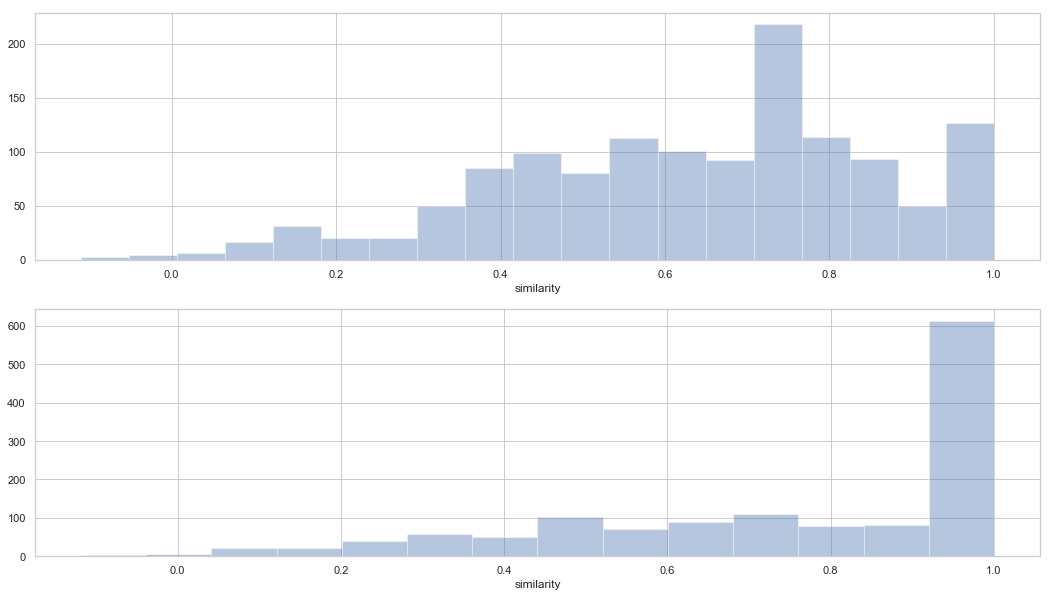

In [6]:
# Subset the data (remove metadata)
vars_to_keep = ['adj_positiveness', 'np_positiveness', 'np']
with_sim_raw = df[vars_to_keep + ['response']]
with_sim_lemma = df[vars_to_keep + ['lemma']]


# Add similarity ratings
with_sim_raw = append_similarity(with_sim_raw).dropna()
with_sim_lemma = append_similarity(with_sim_lemma, y = 'lemma').dropna()

# Plot with/without hue
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)

sns.distplot(with_sim_raw["similarity"], ax = axs[0], kde = False)
sns.distplot(with_sim_lemma["similarity"], ax = axs[1], kde = False)

plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


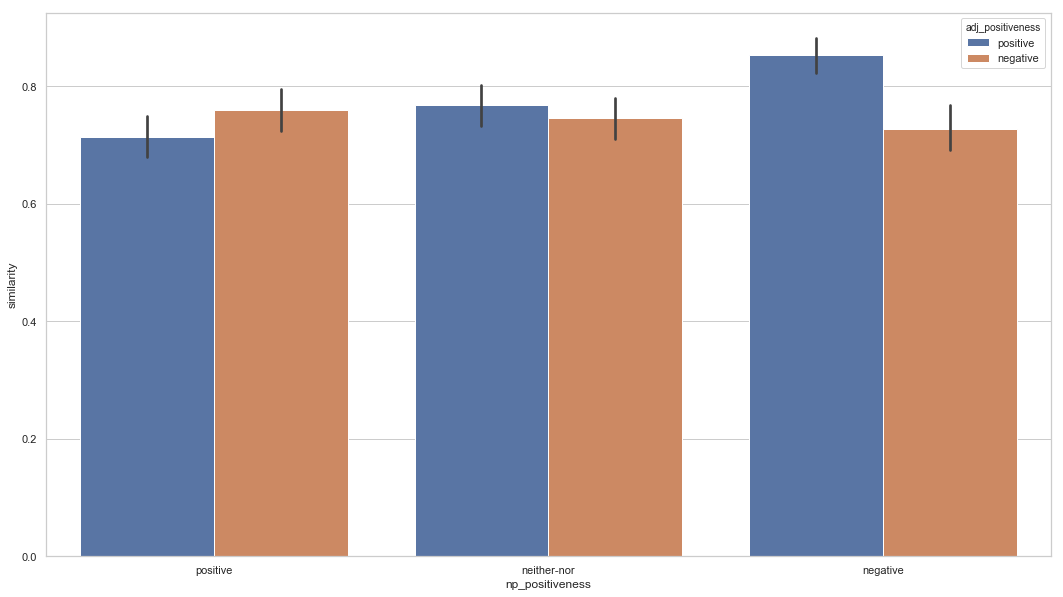

In [11]:
# average similarity based on np group 
sns.set(style = 'whitegrid')

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 10)

sns.barplot(x="np_positiveness", y="similarity", hue="adj_positiveness", data= with_sim_lemma, ax = ax1)


plt.show()

# Average Similarity Based on Positiveness

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


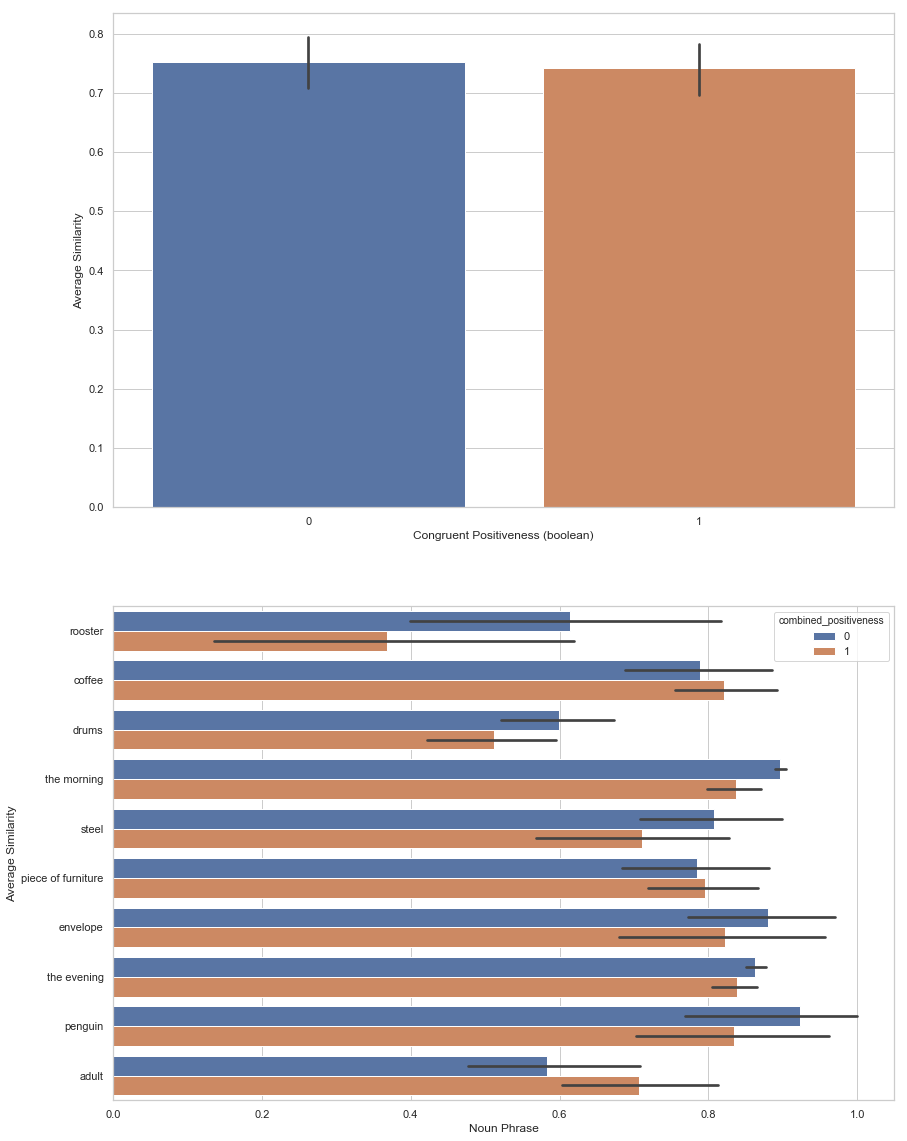

In [12]:
# Remove neither-nor examples, Create combined positiveness -> True if np_positiveness == adj_positive
congruent_positiveness = with_sim_lemma[with_sim_lemma['np_positiveness'] != 'neither-nor']

congruent_positiveness['combined_positiveness'] = congruent_positiveness.apply(lambda row: 1 if row['adj_positiveness'] == row['np_positiveness'] else 0, axis = 1)

congruent_positiveness = congruent_positiveness.drop(columns = ['np_positiveness', 'adj_positiveness'])


# Sort and subset the 5 most common NPs
most_common_nps = congruent_positiveness['np'].value_counts().index.tolist()[:10]
congruent_positiveness = congruent_positiveness[congruent_positiveness['np'].isin(most_common_nps)]


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(nrows = 2)
fig.set_size_inches(14, 20)

sns.barplot(x="combined_positiveness", y="similarity", data = congruent_positiveness, ax = axs[0])
sns.barplot(y="np", x="similarity", hue = "combined_positiveness", data = congruent_positiveness, ax = axs[1])

axs[0].set(ylabel='Average Similarity', xlabel = 'Congruent Positiveness (boolean)')
axs[1].set(ylabel='Average Similarity', xlabel = 'Noun Phrase')

plt.show()


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


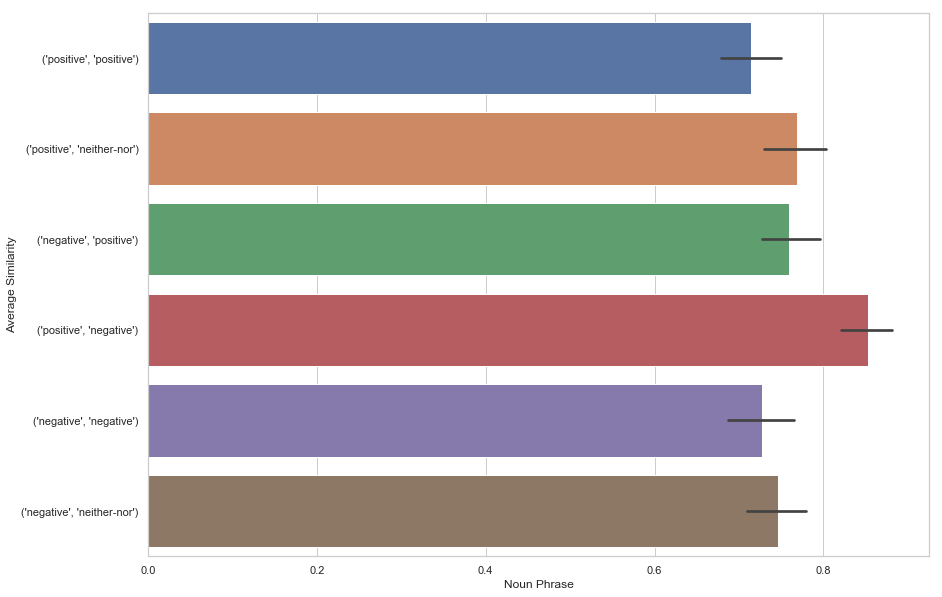

In [13]:
positiveness = with_sim_lemma

positiveness['positiveness'] = positiveness.apply(lambda row: (row['adj_positiveness'], row['np_positiveness']), axis = 1)


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(1,1)
fig.set_size_inches(14, 10)

sns.barplot(y="positiveness", x="similarity", data = positiveness, ax = axs)

# axs[0].set(ylabel='Average Similarity', xlabel = 'Congruent Positiveness (boolean)')
axs.set(ylabel='Average Similarity', xlabel = 'Noun Phrase')

plt.show()
    
    
    

In [24]:
with_identity = with_sim_lemma

with_identity['is_identical'] = with_identity['similarity'].apply(lambda sim: sim >= .97)

with_identity['is_identical'].value_counts()

close_enough = with_identity[with_identity['is_identical'] == True]

close_enough = close_enough[close_enough['similarity'] < .99]
              

close_enough

,adj_positiveness,np_positiveness,np,lemma,similarity,positiveness,is_identical
221,negative,negative,piece of clothing,piece of clothes,0.972995,"(negative, negative)",True
422,negative,negative,tv show,television show,0.981786,"(negative, negative)",True


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

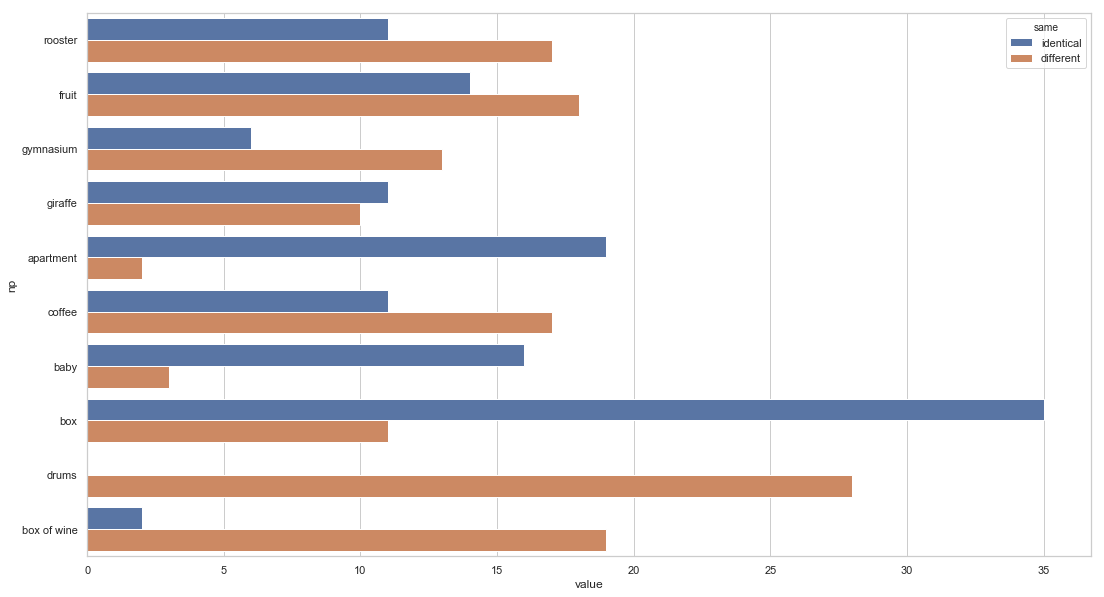

In [23]:
# Subset the 10 most common NPs
subset = with_identity.drop_duplicates()['np'].tolist()[:10]
with_identity = with_identity[with_identity['np'].isin(subset)]


with_identity['count'] = with_identity.groupby(['np']).transform('count').iloc[:, 0]
with_identity['identical'] = with_identity.groupby(['np'])['is_identical'].transform('sum')
with_identity['different'] = with_identity['count'] - with_identity['identical']


same_diff = with_identity[['np', 'identical', 'different']].drop_duplicates()
same_diff = pd.melt(same_diff, id_vars = ['np'], var_name = 'same')


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 10)

ax = sns.barplot(x = 'value', y = 'np', hue = 'same', data = same_diff, ax = ax1)

plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


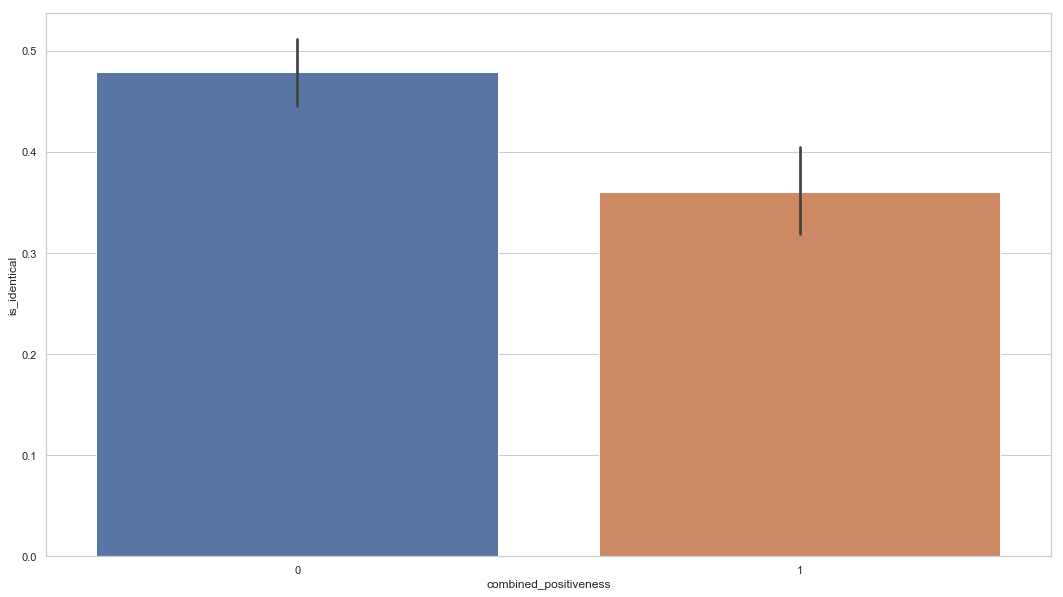

In [29]:
# look at subordinate (identical) vs not reswponses by confruence condition
with_identity['combined_positiveness'] = with_identity.apply(lambda row: 1 if row['adj_positiveness'] == row['np_positiveness'] else 0, axis = 1)

with_identity['count'] = with_identity.groupby(['np']).transform('count').iloc[:, 0]
with_identity['identical'] = with_identity.groupby(['np'])['is_identical'].transform('sum')
with_identity['different'] = with_identity['count'] - with_identity['identical']


# same_diff = with_identity[['np', 'identical', 'different', 'np_positiveness', 'similarity']].drop_duplicates()
# same_diff = pd.melt(same_diff, id_vars = ['np'], var_name = 'same')


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(18, 10)

ax = sns.barplot(x = 'combined_positiveness', y = 'is_identical', data = with_identity, ax = ax1)
# ax = sns.distplot(with_identity['np_positiveness'], hue = 'is_identical')

plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


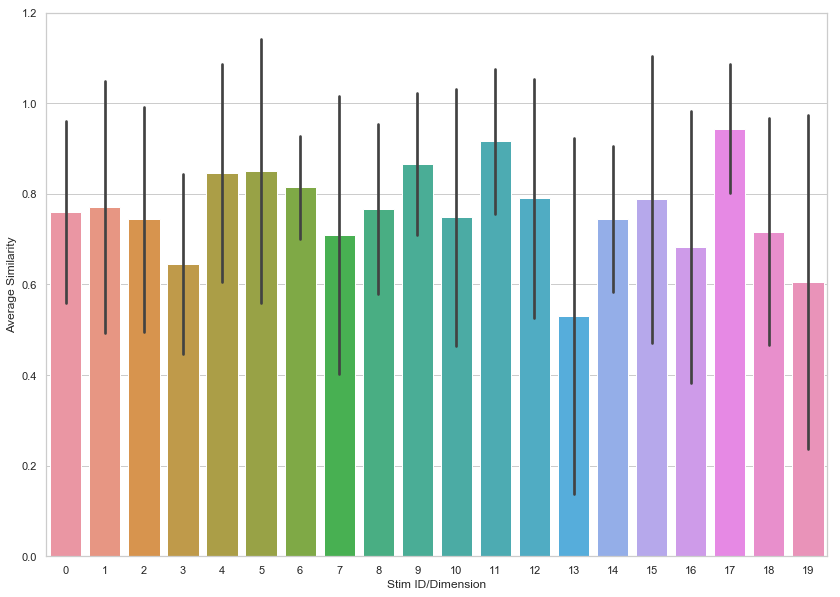

In [31]:
# Subset the data (remove metadata)
vars_to_keep = ['adj_positiveness', 'np_positiveness', 'np', 'lemma', 'stim_id']
with_sim_by_dim = df[vars_to_keep]


# Add similarity ratings
with_sim_by_dim = append_similarity(with_sim_by_dim, y = 'lemma').dropna()


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(1,1)
fig.set_size_inches(14, 10)

sns.barplot(x="stim_id", y="similarity", data = with_sim_by_dim, ax = axs, ci = 'sd')

# axs[0].set(ylabel='Average Similarity', xlabel = 'Congruent Positiveness (boolean)')
axs.set(ylabel='Average Similarity', xlabel = 'Stim ID/Dimension')

plt.show()

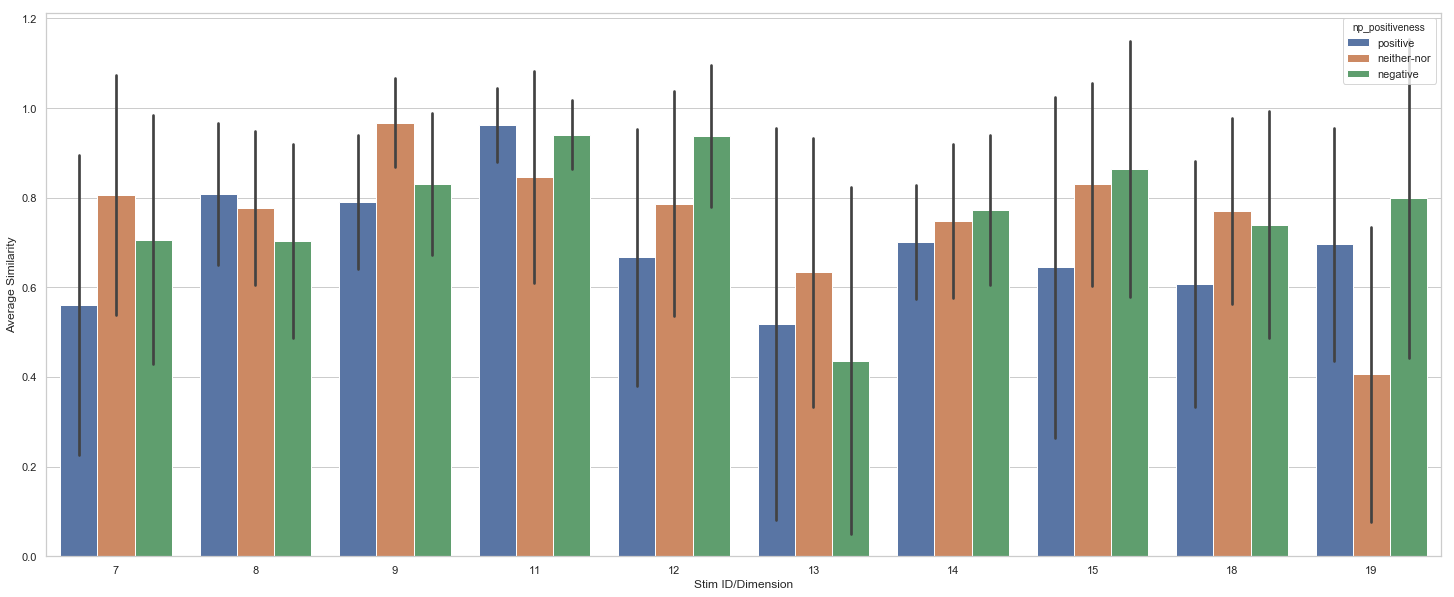

In [32]:
dims_with_subsets = with_sim_by_dim[['np', 'stim_id', 'similarity', 'np_positiveness']]


# Sort and subset the 5 most common NPs
most_common_dims = dims_with_subsets['stim_id'].value_counts().index.tolist()[:10]
dims_with_subsets = dims_with_subsets[dims_with_subsets['stim_id'].isin(most_common_dims)]


dims_with_subsets.sort_values(['stim_id', 'np_positiveness'])
# dims_with_subsets = pd.melt(dims_with_subsets, id_vars = ['stim_id'], var_name = 'same')


# Plot with/without hue
sns.set(style = 'whitegrid')

fig, axs = plt.subplots(1,1)
fig.set_size_inches(25, 10)


sns.barplot(x = "stim_id", y = "similarity", hue = 'np_positiveness', data = dims_with_subsets, ax = axs, 
            ci = 'sd', orient = 'v')

# axs[0].set(ylabel='Average Similarity', xlabel = 'Congruent Positiveness (boolean)')
axs.set(ylabel='Average Similarity', xlabel = 'Stim ID/Dimension')

plt.show()